# Dimensionality Reduction

Exploring how close various dimensionality reduction techniques can get to the true dimensionality of a contrived dataset. 

In [12]:
%matplotlib inline
import skimage as ski
import skimage.data as skid
import SimpleITK as sitk
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
# Document versions used, cause of course this will end up run on some server somewhere
print "Scikit Image:",ski.__version__
print "Simple ITK:",sitk.Version()
print "Matplotlib:",mpl.__version__
print "Numpy:",np.__version__

Scikit Image: 0.13.0
Simple ITK: SimpleITK Version: 1.0.0 (ITK 4.11)
Compiled: Apr  6 2017 16:26:03

Matplotlib: 1.5.1
Numpy: 1.11.3


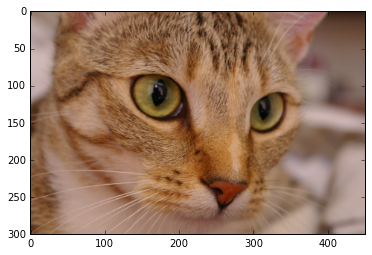

In [13]:
# Cats rule the internetz
z=skid.chelsea()
plt.imshow(z)
plt.show()

We will generate a grid of points, which will be moved and used to define a warp of the image.  The points will be moved in a circle - this is a one dimensional shape, so the inherent dimensionality of the generated images is one.  

(We could also transform the color space... future thought.)

(-0.5, 450.5)

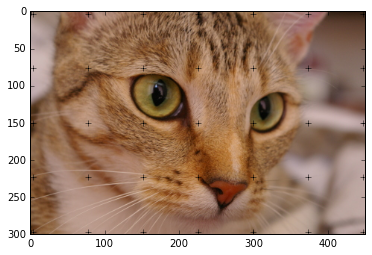

In [11]:
nbpoints=(7,5)
(x,y)=np.meshgrid(np.linspace(3,z.shape[1]-3,nbpoints[0]),np.linspace(3,z.shape[0]-3,nbpoints[1]))
plt.imshow(z)
yl=plt.ylim()
xl=plt.xlim()
plt.plot(x,y,'k+')
plt.ylim(yl)
plt.xlim(xl)

In [27]:
# JSAnimation import available at https://github.com/jakevdp/JSAnimation
#from JSAnimation import IPython_display
from matplotlib import animation
from tempfile import NamedTemporaryFile

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)
# create a simple animation
from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))



fig = plt.figure()
im=plt.imshow(z)
yl=plt.ylim()
xl=plt.xlim()
ax = plt.gca()
pts, = ax.plot([], [], 'w+')
radii=np.array([ np.sqrt((a-z.shape[0]/2.)**2+(b-z.shape[1]/2.)**2) for a,b in zip(x,y)])

def init():
    pts.set_data([], [])
    return pts,

def animate(i):
    #yl=ax.get_ylim()
    #xl=ax.get_xlim()
    pts.set_data(x+(240-radii)/3.*(np.sin(np.deg2rad(i*5))+1), y+(240-radii)/3.*(np.cos(np.deg2rad(i*5))+1))
    ax.set_ylim(yl)
    ax.set_xlim(xl)
    return pts,

anim=animation.FuncAnimation(fig, animate, init_func=init,
                        frames=72, interval=20, blit=True)
display_animation(anim)